In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Model 2. Decision Tree Regression

In [3]:
GOOGL = pd.read_csv('data/GOOGL.csv').rename(columns={'4. close':'GOOGL close'})
AMZN = pd.read_csv('data/AMZN.csv').rename(columns={'4. close':'AMZN close'})
AAPL = pd.read_csv('data/AAPL.csv').rename(columns={'4. close':'AAPL close'})
META = pd.read_csv('data/META.csv').rename(columns={'4. close':'META close'})
MSFT = pd.read_csv('data/MSFT.csv').rename(columns={'4. close':'MSFT close'})

In [4]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [29]:
#Response and Predictor
X = pd.concat([AMZN["AMZN close"], AAPL["AAPL close"], 
               META["META close"], MSFT["MSFT close"]], axis=1)
y = GOOGL["GOOGL close"]

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeRegressor(max_depth=3)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

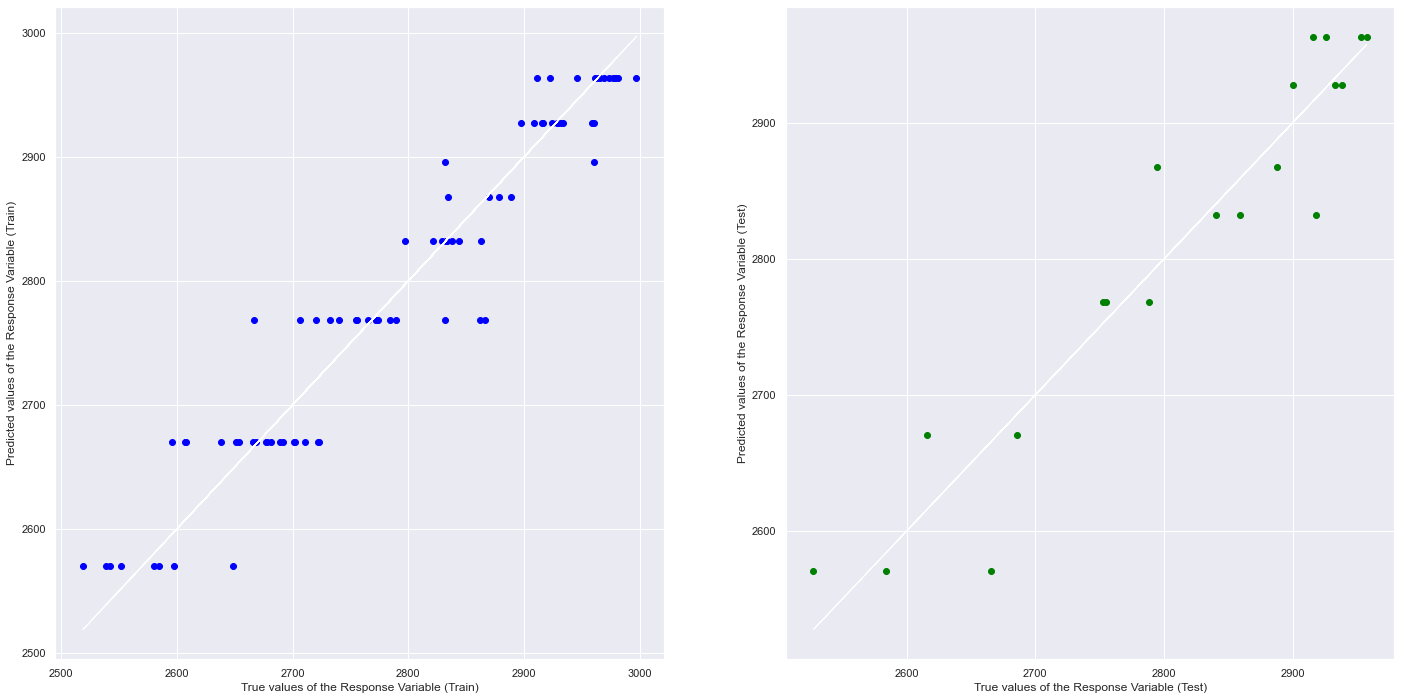

In [30]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 1273.533873809489

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 1683.5443097785592



The decision tree regression model has similar MSE as the linear regression model. Hence, both models are good in predicting the close price of Google.

[Text(558.0, 570.7800000000001, 'AMZN close <= 3291.305\nmse = 17641.715\nsamples = 80\nvalue = 2794.537'),
 Text(279.0, 407.70000000000005, 'AAPL close <= 169.34\nmse = 8836.152\nsamples = 44\nvalue = 2697.949'),
 Text(139.5, 244.62, 'AAPL close <= 160.345\nmse = 3550.598\nsamples = 26\nvalue = 2639.466'),
 Text(69.75, 81.53999999999996, 'mse = 1491.782\nsamples = 8\nvalue = 2570.291'),
 Text(209.25, 81.53999999999996, 'mse = 1393.668\nsamples = 18\nvalue = 2670.211'),
 Text(418.5, 244.62, 'AAPL close <= 175.38\nmse = 4394.577\nsamples = 18\nvalue = 2782.423'),
 Text(348.75, 81.53999999999996, 'mse = 2619.159\nsamples = 16\nvalue = 2768.236'),
 Text(488.25, 81.53999999999996, 'mse = 4106.246\nsamples = 2\nvalue = 2895.92'),
 Text(837.0, 407.70000000000005, 'MSFT close <= 331.51\nmse = 3065.395\nsamples = 36\nvalue = 2912.589'),
 Text(697.5, 244.62, 'META close <= 333.5\nmse = 626.045\nsamples = 12\nvalue = 2844.025'),
 Text(627.75, 81.53999999999996, 'mse = 309.033\nsamples = 8\nvalue

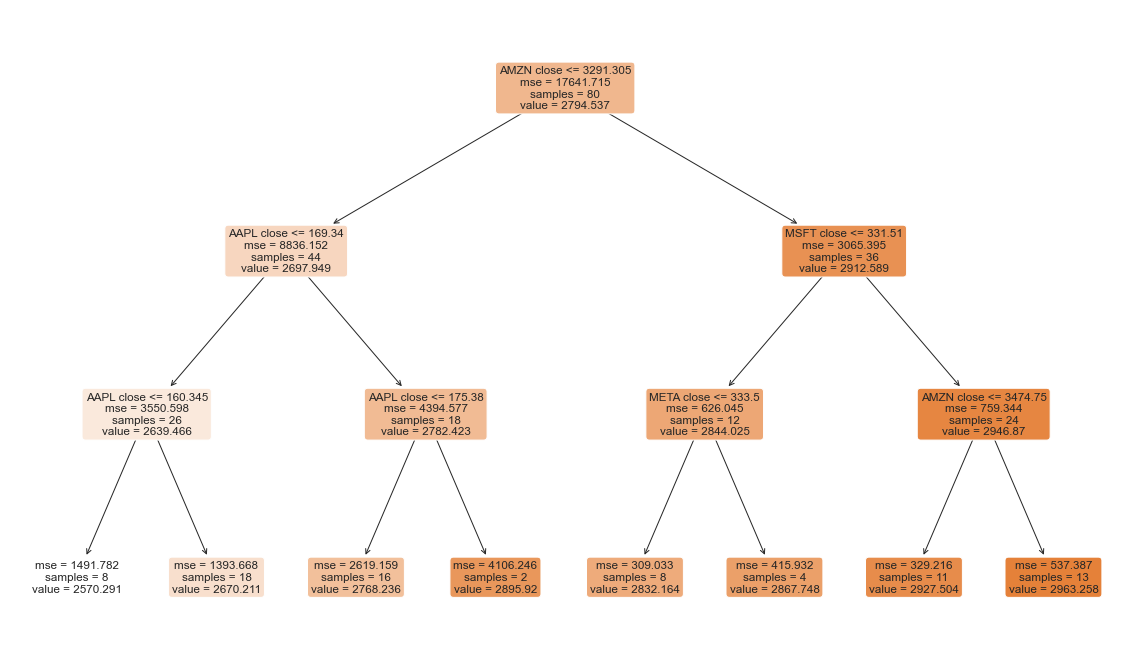

In [31]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns)

Most important to least important predictor: Amazon, Apple, Microsoft, Meta

In [33]:
y_train_pred_df = pd.DataFrame(y_train_pred) #makes train prediction into dataframe
y_test_pred_df = pd.DataFrame(y_test_pred) #makes test prediction into dataframe

In [34]:
y_train_pred_df["index"] = y_train.index #copies the original index from the raw data
y_train_pred_df = y_train_pred_df.set_index("index") #sets index

y_test_pred_df["index"] = y_test.index #copies the original index from the raw data
y_test_pred_df = y_test_pred_df.set_index("index") #sets index

all_pred_df = pd.concat([y_test_pred_df, y_train_pred_df], axis=0)
all_pred_df = all_pred_df.sort_index()

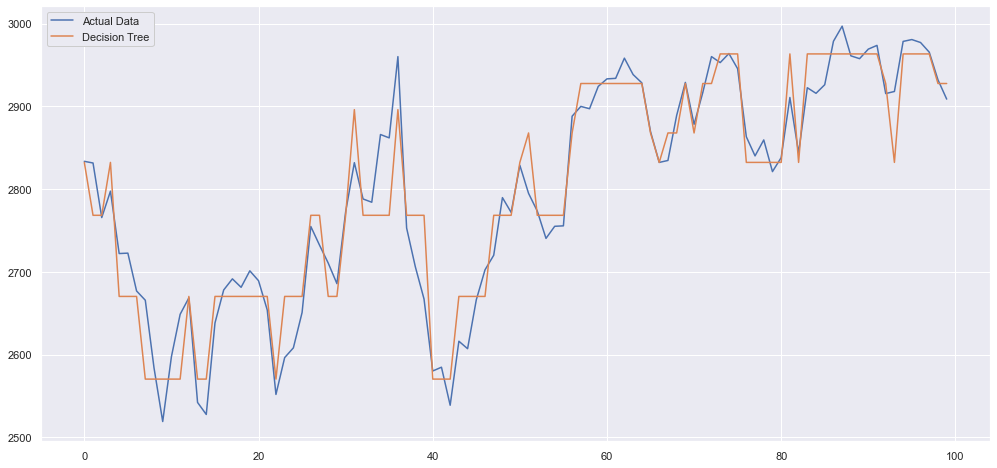

In [35]:
f, axes = plt.subplots(1,figsize=(17, 8))

plt.plot(y, label='Actual Data')
plt.plot(all_pred_df, label='Decision Tree')

plt.legend(framealpha=1, frameon=True);

In [36]:
# Check the Goodness of Fit
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, all_pred_df))

Mean Squared Error (MSE) 	: 1355.5359610033029
